In [1]:
import keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [0]:
import numpy as np
import tensorflow as tf

In [0]:
def normalization(images):
    images = images.reshape(-1, 3072)
    each_pixel_mean = images.mean(axis=0)
    each_pixel_std = np.std(images, axis=0)
    images = np.divide(np.subtract(images, each_pixel_mean), each_pixel_std)
    return images.reshape(-1, 32, 32, 3)

In [0]:
images, training_labels = normalization(x_train), y_train
test_image, test_labels = normalization(x_test), y_test

In [0]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [6]:
# max_depth=13,random_state=0,min_samples_split=20,n_estimators=32,min_samples_leaf=3
n_training = len(images)
n_test = len(test_image)
images = images.reshape((n_training, 3072))
test_image = test_image.reshape((n_test,3072))

def ranforestclassfier(images,test_image,training_labels,test_labels):

    clf = RandomForestClassifier(max_depth=13,random_state=0,min_samples_split=20,n_estimators=32,min_samples_leaf=3)
    clf.fit(images, training_labels)
    predict_labels = clf.predict(test_image)
    accuracy = accuracy_score(test_labels, predict_labels)
    return predict_labels, accuracy

predict_labels, accuracy = ranforestclassfier(images,test_image,training_labels,test_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [0]:
test_labels = y_test.T[0]

In [8]:
def confusion_matrix(actual, predict):
    cmatrix = np.zeros((10, 10)).astype(int)
    for i in range(10000):
        if actual[i] == predict[i]:
            cmatrix[actual[i]][actual[i]] += 1
        else:
            cmatrix[actual[i]][predict[i]] += 1
    return cmatrix

cm = confusion_matrix(test_labels, predict_labels)
print(cm)
print("Accuracy = {:>6.4f}".format(cm.diagonal().sum()*1.0/cm.sum()))

[[512  39  47  17  41  21  29  33 193  68]
 [ 24 513  19  32  23  38  50  31  60 210]
 [106  52 267  61 171  67 143  66  30  37]
 [ 56  50  53 203  90 188 176  78  25  81]
 [ 50  22 126  45 392  51 170  88  28  28]
 [ 31  28  73 137  89 385  99  85  29  44]
 [ 11  39  70  53 124  60 546  35  10  52]
 [ 43  43  34  55 118  83  59 424  32 109]
 [ 74  82  20  22  25  44  20  26 598  89]
 [ 45 150  15  31  22  27  31  43  83 553]]
Accuracy = 0.4393


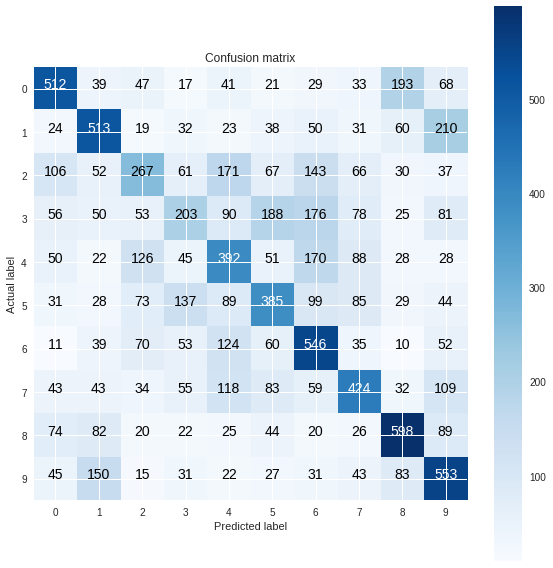

In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np
import itertools
%matplotlib inline

def plot_confusion_matrix(cm, label_num):
    labels = range(label_num)
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    marks = np.arange(len(labels))
    plt.xticks(marks, labels)
    plt.yticks(marks, labels)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, int(cm[i, j]), fontsize=14,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm, 10)

In [10]:
def evaluation(cmatrix):
    print("|  Label  | Precision | Recall | F-Score |")
    total_p = 0
    total_r = 0
    total_f = 0
    for i in range(10):
        precision = cmatrix[i, i]*1.0/cmatrix[:, i].sum()
        recall = cmatrix[i, i]*1.0/cmatrix[i, :].sum()
        fscore = precision*recall*2.0/(precision+recall)
        total_p += precision
        total_r += recall
        total_f += fscore
        print('|{:>8d} | {:>9.4f} | {:>6.4f} | {:>7.4f} |'.format(i, precision, recall, fscore))
    print('| Average | {:>9.4f} | {:>6.4f} | {:>7.4f} |'.format(total_p/10.0, total_r/10.0, total_f/10.0))

evaluation(cm)

|  Label  | Precision | Recall | F-Score |
|       0 |    0.5378 | 0.5120 |  0.5246 |
|       1 |    0.5039 | 0.5130 |  0.5084 |
|       2 |    0.3688 | 0.2670 |  0.3097 |
|       3 |    0.3095 | 0.2030 |  0.2452 |
|       4 |    0.3580 | 0.3920 |  0.3742 |
|       5 |    0.3994 | 0.3850 |  0.3921 |
|       6 |    0.4127 | 0.5460 |  0.4701 |
|       7 |    0.4664 | 0.4240 |  0.4442 |
|       8 |    0.5496 | 0.5980 |  0.5728 |
|       9 |    0.4351 | 0.5530 |  0.4870 |
| Average |    0.4341 | 0.4393 |  0.4328 |


In [11]:
#crossvalidation

def evaluation(scores):
    print("|Folder No.|   Score   |")
    scoreave = 0
    for i in range(10):
        thescore = scores[i]
        scoreave = scoreave+scores[i]
        print('|{:>9d} | {:>9.4f} |'.format(i, thescore))
    print('| Average  | {:>9.4f} |'.format(scoreave/10.0))
        
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=13,random_state=0,min_samples_split=20,n_estimators=32,min_samples_leaf=3)
n_training = len(images)
images = images.reshape((n_training, 3072))
scores = cross_val_score(clf, images, training_labels, cv=10)

evaluation(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 

|Folder No.|   Score   |
|        0 |    0.4368 |
|        1 |    0.4318 |
|        2 |    0.4252 |
|        3 |    0.4148 |
|        4 |    0.4390 |
|        5 |    0.4304 |
|        6 |    0.4206 |
|        7 |    0.4268 |
|        8 |    0.4218 |
|        9 |    0.4264 |
| Average  |    0.4274 |
